In [1]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from pprint import pprint
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)
    
    
#TD-IDF Features    
#Training Features
training_features_path = "./Pickles/tdidf_training_features.pickle"
with open(training_features_path, 'rb') as data:
    tdidf_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/tdidf_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    tdidf_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/tdidf_test_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/tdidf_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/tdidf_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/tdidf_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_validation_labels = pickle.load(data)
    
    
#Sequence Vector Features    
#Training Features
training_features_path = "./Pickles/sv_training_features.pickle"
with open(training_features_path, 'rb') as data:
    sv_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/sv_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    sv_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/sv_test_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/sv_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/sv_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/sv_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_validation_labels = pickle.load(data)

In [3]:
print(tdidf_training_features.shape)
print(tdidf_test_features.shape)

(5760, 1000)
(720, 1000)


In [4]:
dt_0 = DecisionTreeClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(dt_0.get_params())

Parameters currently in use:

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 8,
 'splitter': 'best'}


In [46]:
random_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": randint(2, 500),
              "max_depth": randint(1, 1000),
              "min_samples_leaf": randint(1, 500),
              "max_leaf_nodes": randint(2, 500)}

In [47]:
# First create the base model to tune
dt = DecisionTreeClassifier(random_state = 8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(tdidf_training_features, tdidf_training_labels)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   43.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=8,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a230de358>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a230de240>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a230de978>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a230de7b8>},
          pre_dispatch='2*n_jobs', random_state=8, refit=True,
          return_train_score='

In [48]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'criterion': 'gini', 'max_depth': 542, 'max_leaf_nodes': 480, 'min_samples_leaf': 3, 'min_samples_split': 142}

The mean accuracy of a model with these hyperparameters is:
0.659375


In [49]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [30, 40, 35],
              "max_depth": [None, 400, 550, 650],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [None, 80, 90, 100],
              }

# Create a base model
dt = DecisionTreeClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(tdidf_training_features, tdidf_training_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:  9.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=8,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [30, 40, 35], 'max_depth': [None, 400, 550, 650], 'min_samples_leaf': [5, 10, 20], 'max_leaf_nodes': [None, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [50]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 80, 'min_samples_leaf': 5, 'min_samples_split': 40}

The mean accuracy of a model with these hyperparameters is:
0.6629843941785025


In [51]:
best_dt = grid_search.best_estimator_

In [52]:
best_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=80,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=8,
            splitter='best')

In [53]:
best_dt.fit(tdidf_training_features, tdidf_training_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=80,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=8,
            splitter='best')

In [54]:
dt_pred = best_dt.predict(tdidf_test_features)

In [55]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(tdidf_training_labels, best_dt.predict(tdidf_training_features)))

The training accuracy is: 
0.7565972222222223


In [56]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(tdidf_test_labels, dt_pred))

The test accuracy is: 
0.7069444444444445


In [57]:

# Classification report
print("Classification report")
print(classification_report(tdidf_test_labels,dt_pred))

Classification report
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       130
           2       0.91      0.84      0.87       130
           3       0.60      0.73      0.66       113
           4       0.64      0.67      0.66       113
           5       0.66      0.51      0.57       110
           6       0.66      0.68      0.67       124

   micro avg       0.71      0.71      0.71       720
   macro avg       0.71      0.70      0.70       720
weighted avg       0.71      0.71      0.71       720



In [58]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

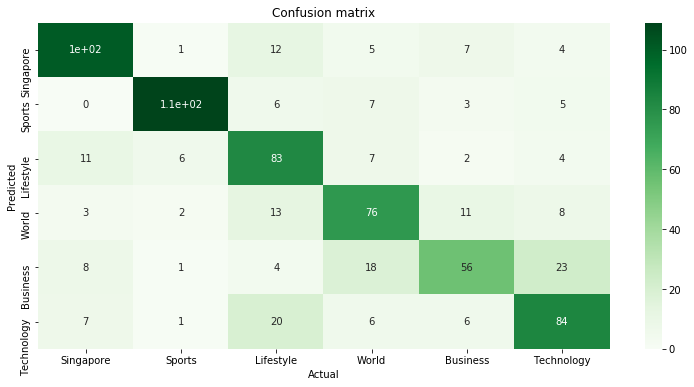

In [59]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(tdidf_test_labels, dt_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [60]:
base_model = DecisionTreeClassifier(random_state = 8)
base_model.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, base_model.predict(tdidf_test_features))

0.6597222222222222

In [61]:
best_dt.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, best_dt.predict(tdidf_test_features))

0.7069444444444445

In [62]:
d = {
     'Model': 'Decision Tree',
     'Training Set Accuracy': accuracy_score(tdidf_training_labels, best_dt.predict(tdidf_training_features)),
     'Test Set Accuracy': accuracy_score(tdidf_test_labels, dt_pred)
}

df_models_dt = pd.DataFrame(d, index=[0])

In [63]:
df_models_dt

,Model,Training Set Accuracy,Test Set Accuracy
0,Decision Tree,0.756597,0.706944


In [65]:
with open('Models/decisionTree_best_model.pickle', 'wb') as output:
    pickle.dump(best_dt, output)
    
with open('Models/decisionTree_best_model_details.pickle', 'wb') as output:
    pickle.dump(df_models_dt, output)